# Определение перспективного тарифа для телеком-компании

### Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.  
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов
#### Тариф «Смарт»
Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета: 
1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 
2. сообщение: 3 рубля; 
3. 1 Гб интернет-трафика: 200 рублей.
  
#### Тариф «Ультра»
Ежемесячная плата: 1950 рублей  
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета: 
1. минута разговора: 1 рубль; 
2. сообщение: 1 рубль; 
3. 1 Гб интернет-трафика: 150 рублей.

## Общая информация

### Открываем файлы и изучаем данные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st

In [2]:
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

Проверим, что данные отображаются корректно и с ними можно работать.

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Данные выгрузились нормально.  
Посмотрим что представляют из себя данные.

In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Описание данных

##### Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tarif — название тарифного плана  
  
##### Таблица calls (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок  
  
##### Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение  
  
##### Таблица internet (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя  
  
##### Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Вывод

Данные разделены на пять датасетов.  
Четыре из них связаны по столбцу `user_id`: 
* users - данные о пользователях
* calls - данные о звонках
* messages - данные о сообщениях
* internet - данные об использовании интернета
  
И один независимый:
* tariffs - данные о двух тарифах, предлагаемых компанией  

##### Задачи на предобработку данных:
* Объединитиь таблицы `calls`, `internet`, `messages`, сгруппировав их по месяцам.
* Проверить на дубликаты.
* Поиск ошибок в данных и проверка методом `describe()`.

##### Задачи по расчету промежуточных итогов по каждому пользователю:
* Количество сделанных звонков и израсходованных минут разговора по месяцам.
* Количество отправленных сообщений по месяцам.
* Объем израсходованного интернет-трафика по месяцам.
* Помесячную выручку с каждого пользователя (вычитаем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножаем на значение из тарифного плана; прибавляем абонентскую плату, соответствующую тарифному плану).

## Предобработка данных

### Объединим таблицы `calls`, `internet`, `messages`, сгруппировав их по месяцам
Для работы с данными нас не интересуют разовые звонки или смс. Удобнее будет сразу сгруппировать данные по месяцам и пользователям и объединить их в единую таблицу.  
Для этого мы подсчитаем:
* Количество сделанных звонков и израсходованных минут разговора по месяцам.
* Количество отправленных сообщений по месяцам.
* Объем израсходованного интернет-трафика по месяцам.

После чего объединим три таблиццы в одну.

Приведем столбец с датой в таблицах к удобному формату.

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
print(calls.call_date.dtype)

datetime64[ns]


In [14]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
print(internet.session_date.dtype)

datetime64[ns]


In [15]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
print(messages.message_date.dtype)

datetime64[ns]


Добавим в таблицы столбец с месяцем, который возьмем из столбца с датой.

In [16]:
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

Округлим кол-во минут разговора до целого в большую сторону. Это соответствует политике оператора.

In [17]:
calls['duration'] = calls['duration'].apply(np.ceil)

Сгруппируем таблицы по двум столбцам: `user_id` и `month`.  
* В `calls` суммируем данные из столбца `duration`.
* В `internet` суммируем данные из столбца `mb_used`.
* В `messages` подсчитаем кол-во смс по столбцу `id`.

In [18]:
calls_g = calls.groupby(by=['user_id', 'month']).agg({'duration': ['count', 'sum']}).reset_index()
internet_g = internet.groupby(by=['user_id', 'month'])['mb_used'].sum().reset_index()
messages_g = messages.groupby(by=['user_id', 'month'])['id'].count().reset_index()

Приведем в порядок названия столбцов.

In [19]:
calls_g.columns = ['user_id', 'month', 'count_calls', 'talk_time']
messages_g.columns = ['user_id', 'month', 'count_messages']

Объединим таблицы методом `merge` в одну общую таблицу.

In [20]:
users_info = calls_g.merge(internet_g, on = ['user_id', 'month'], how = 'outer')
users_info = users_info.merge(messages_g, on = ['user_id', 'month'], how = 'outer')
users_info.head()

,user_id,month,count_calls,talk_time,mb_used,count_messages
0,1000,5,22.0,159.0,2253.49,22.0
1,1000,6,43.0,172.0,23233.77,60.0
2,1000,7,47.0,340.0,14003.64,75.0
3,1000,8,52.0,408.0,14055.93,81.0
4,1000,9,58.0,466.0,14568.91,57.0


In [21]:
users_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id           3214 non-null int64
month             3214 non-null int64
count_calls       3174 non-null float64
talk_time         3174 non-null float64
mb_used           3203 non-null float64
count_messages    2717 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


Округлим МБ интернет трафика до ГБ, в соответствии с политикой компании в большую сторону.

In [22]:
def internet_to_gb(mb_used):
    if (mb_used % 1024) > 0:
        return (mb_used // 1024) + 1
    else:
        return mb_used // 1024

In [23]:
users_info['gb_used'] = users_info['mb_used'].apply(internet_to_gb)
users_info.head()

,user_id,month,count_calls,talk_time,mb_used,count_messages,gb_used
0,1000,5,22.0,159.0,2253.49,22.0,3.0
1,1000,6,43.0,172.0,23233.77,60.0,23.0
2,1000,7,47.0,340.0,14003.64,75.0,14.0
3,1000,8,52.0,408.0,14055.93,81.0,14.0
4,1000,9,58.0,466.0,14568.91,57.0,15.0


### Поиск ошибок в данных и проверка методом describe( )
Далее мы будем работать с таблицами:
* `users`
* `users_info`
* `tariffs`
  
Остальные таблицы нам не понадобятся.

Посмотрим на эти таблицы методом describe().

In [24]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


In [25]:
users_info.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,3214.0,1251.590230,144.659172,1000.0,1125.000,1253.00,1378.750,1499.00
month,3214.0,8.317362,2.905413,1.0,6.000,9.00,11.000,12.00
count_calls,3174.0,63.833333,32.678036,1.0,41.000,63.00,83.000,244.00
talk_time,3174.0,456.931632,238.031270,0.0,290.000,447.00,592.000,1673.00
mb_used,3203.0,17266.708626,7516.356902,0.0,12526.905,16963.11,21432.175,49745.69
count_messages,2717.0,45.283769,35.051363,1.0,19.000,38.00,63.000,224.00
gb_used,3203.0,17.358414,7.343379,0.0,13.000,17.00,21.000,49.00


In [26]:
tariffs.describe().T

,count,mean,std,min,25%,50%,75%,max
messages_included,2.0,525.0,671.751442,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,23040.0,10861.160159,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,1750.0,1767.766953,500.0,1125.0,1750.0,2375.0,3000.0
rub_monthly_fee,2.0,1250.0,989.949494,550.0,900.0,1250.0,1600.0,1950.0
rub_per_gb,2.0,175.0,35.355339,150.0,162.5,175.0,187.5,200.0
rub_per_message,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0
rub_per_minute,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0


#### Краткие выводы
* Таблица `users` выглядит нормально.
* Таблица `users_info` требует доработки, у некоторых пользователей отсутствуют значения в данных. Нули в данных о времени разговора и мб интернета говорят о том, что пользователь не пользовался данной услугой: либо не дозвонился, либо не подключился к интернету.
* Таблица `tariffs` выглядит нормально.

#### Заполним пустые значения в таблице `users_info`.
Учитывая, что мы объединяли таблицы, вполне допустимо, что данные по некоторым пользователям отсутствовали, по причине их неактивности в заданном сегменте услуг. Заполним эти значения нулями. 

In [27]:
users_info = users_info.fillna(0)
users_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
user_id           3214 non-null int64
month             3214 non-null int64
count_calls       3214 non-null float64
talk_time         3214 non-null float64
mb_used           3214 non-null float64
count_messages    3214 non-null float64
gb_used           3214 non-null float64
dtypes: float64(5), int64(2)
memory usage: 200.9 KB


#### Проверим значения, указанные в таблице `users`.
В первую очередь нас интересуют города и тарифные планы.

In [28]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [29]:
users.city.unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [30]:
users.tariff.unique()

array(['ultra', 'smart'], dtype=object)

Все выглядит нормально.

### Дополнительные проверки

#### Дата оттока всегда позже даты регистрации

In [31]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [69]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
print(users.churn_date.dtype)

datetime64[ns]


In [70]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
print(users.reg_date.dtype)

datetime64[ns]


In [66]:
users[users['reg_date'] > users['churn_date']]['user_id'].count()

0

#### Нет действий пользователя до регистрации

In [85]:
calls_reg_date = calls.merge(users[['user_id', 'reg_date']], on = ['user_id'])
calls_reg_date['call_date'] = pd.to_datetime(calls_reg_date['call_date'], format='%Y-%m-%d')
calls_reg_date[calls_reg_date['reg_date'] > calls_reg_date['call_date']]['user_id'].count()

0

In [87]:
internet_reg_date = internet.merge(users[['user_id', 'reg_date']], on = ['user_id'])
internet_reg_date['session_date'] = pd.to_datetime(internet_reg_date['session_date'], format='%Y-%m-%d')
internet_reg_date[internet_reg_date['reg_date'] > internet_reg_date['session_date']]['user_id'].count()

0

In [89]:
messages_reg_date = messages.merge(users[['user_id', 'reg_date']], on = ['user_id'])
messages_reg_date['message_date'] = pd.to_datetime(messages_reg_date['message_date'], format='%Y-%m-%d')
messages_reg_date[messages_reg_date['reg_date'] > messages_reg_date['message_date']]['user_id'].count()

0

Можно было бы написать функцию, но так быстрее и дальше она не пригодится.

#### Нет действий пользователя после оттока

In [95]:
calls_churn_date = calls.merge(users[['user_id', 'churn_date']], on = ['user_id'])
calls_churn_date['call_date'] = pd.to_datetime(calls_churn_date['call_date'], format='%Y-%m-%d')
calls_churn_date[calls_churn_date['churn_date'] < calls_churn_date['call_date']]['user_id'].count()

0

In [92]:
internet_churn_date = internet.merge(users[['user_id', 'churn_date']], on = ['user_id'])
internet_churn_date['session_date'] = pd.to_datetime(internet_churn_date['session_date'], format='%Y-%m-%d')
internet_churn_date[internet_churn_date['churn_date'] < internet_churn_date['session_date']]['user_id'].count()

0

In [93]:
messages_churn_date = messages.merge(users[['user_id', 'churn_date']], on = ['user_id'])
messages_churn_date['message_date'] = pd.to_datetime(messages_churn_date['message_date'], format='%Y-%m-%d')
messages_churn_date[messages_churn_date['churn_date'] < messages_churn_date['message_date']]['user_id'].count()

0

Можно было бы сразу добавить и дату регистрации и дату отключения в звонки и делать проверки сразу на все.  
Но я только сейчас до этого додумался, а в рамках этого маленького проекта такая оптимизация не играет большой роли.

### Проверка дубликатов
На всякий случай проверим дубликаты.

In [32]:
users.duplicated().sum()

0

In [33]:
users_info.duplicated().sum()

0

### Проверка диапазона данных
Проверим данные пользователей на слишком высокие значения. В рамках исследования они могут помешать нам исследовать предпочтения пользователей. Для этого воспользуемся функцией из одного из прошлых проектов.

In [34]:
def rare_values(df):
    numerics = (['int8', 'int16', 'int32', 'int64', 
                 'uint8', 'uint16', 'uint32', 'uint64',
                 'float16', 'float32', 'float64'])
    df_test = df.select_dtypes(include=numerics)
    for col in df_test.columns:
        q1 = df_test[col].quantile(0.25)
        q3 = df_test[col].quantile(0.75)
        iqr = q3 - q1
        bot_border = q1 - iqr*1.5
        top_border = q3 + iqr*1.5
        rare_values_bot = df.query(f'{col} < @bot_border')[col].count()
        rare_values_top = df.query(f'{col} > @top_border')[col].count()
        print (f'Колонка - {col}\n'
                f'Первый квартиль = {q1}, Третий квартиль = {q3}\n'
                f'Нижняя граница = {bot_border}, Верхняя граница = {top_border}\n'
                f'Редкие значения меньше нижней границы = {rare_values_bot}\n'
                f'Редкие значения больше верхней границы = {rare_values_top}\n'
               )

In [35]:
rare_values(users_info[['talk_time', 'mb_used', 'count_messages']])

Колонка - talk_time
Первый квартиль = 282.0, Третий квартиль = 589.0
Нижняя граница = -178.5, Верхняя граница = 1049.5
Редкие значения меньше нижней границы = 0
Редкие значения больше верхней границы = 63

Колонка - mb_used
Первый квартиль = 12491.89, Третий квартиль = 21424.624999999996
Нижняя граница = -907.212499999996, Верхняя граница = 34823.72749999999
Редкие значения меньше нижней границы = 0
Редкие значения больше верхней границы = 77

Колонка - count_messages
Первый квартиль = 9.0, Третий квартиль = 57.0
Нижняя граница = -63.0, Верхняя граница = 129.0
Редкие значения меньше нижней границы = 0
Редкие значения больше верхней границы = 91



Выходящих за общие рамки значений не так много, поэтому уберем их на всякий случай.

In [36]:
users_info = users_info[users_info['talk_time'] <= 1050]
users_info = users_info[users_info['mb_used'] <= 34824]                        
users_info = users_info[users_info['count_messages'] <= 129]

In [37]:
users_info.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,3012.0,1251.886786,145.953381,1000.0,1122.75,1251.000,1382.00,1499.00
month,3012.0,8.260956,2.921359,1.0,6.00,9.000,11.00,12.00
count_calls,3012.0,60.599270,29.338434,0.0,40.00,61.000,80.00,165.00
talk_time,3012.0,433.510624,213.348154,0.0,281.00,437.000,570.25,1045.00
mb_used,3012.0,16476.040435,6693.070387,0.0,12272.17,16618.955,20812.66,34709.11
count_messages,3012.0,34.752988,30.196996,0.0,9.00,29.000,54.00,129.00
gb_used,3012.0,16.583997,6.541586,0.0,12.00,17.000,21.00,34.00


### Посчитаем помесячную выручку с каждого пользователя
Вычитаем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножаем на значение из тарифного плана; прибавляем абонентскую плату, соответствующую тарифному плану.

Сперва добавим в таблицу `users_info` информацию о тарифе, для удобства.

In [38]:
users_info = users_info.merge(users[['user_id', 'tariff']], on = ['user_id'])

Теперь напишем функцию для подсчета выручки.

In [39]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [109]:
def user_earnings(row):
    # старая функция, первый вариант
    if row.tariff == 'smart':
        earnings = 550
        if row.count_messages > 50:
            earnings += (row.count_messages - 50) * 3
        if row.gb_used > (15360/1024):
            earnings += (row.gb_used - 15360/1024) * 200
        if row.talk_time > 500:
            earnings += (row.talk_time - 500) * 3
        return earnings
    elif row.tariff == 'ultra':
        earnings = 1950
        if row.count_messages > 1000:
            earnings += (row.count_messages - 1000) * 1
        if row.gb_used > (30720/1024):
            earnings += (row.gb_used - 30720/1024) * 150
        if row.talk_time > 3000:
            earnings += (row.talk_time - 3000) * 1
        return earnings
    
    
def user_earnings_2(row):
    # переписал функцию, оптимизировав под любой тариф в заданной структуре
    index = tariffs.index[tariffs['tariff_name'] == row.tariff].tolist()[0]
    earnings = tariffs.loc[index, 'rub_monthly_fee']
    messages_included = tariffs.loc[index, 'messages_included']
    mb_per_month_included = tariffs.loc[index, 'mb_per_month_included']    
    minutes_included = tariffs.loc[index, 'minutes_included']
    rub_per_gb = tariffs.loc[index, 'rub_per_gb'] 
    rub_per_message = tariffs.loc[index, 'rub_per_message'] 
    rub_per_minute = tariffs.loc[index, 'rub_per_minute'] 

    if row.count_messages > messages_included:
        earnings += (row.count_messages - messages_included) * rub_per_message
    if row.gb_used > (mb_per_month_included/1024):
        earnings += (row.gb_used - mb_per_month_included/1024) * rub_per_gb
    if row.talk_time > minutes_included:
        earnings += (row.talk_time - minutes_included) * rub_per_minute
        
    return earnings    


In [107]:
users_info['earnings'] = users_info.apply(user_earnings_2, axis=1)

In [108]:
users_info.head()

,user_id,month,count_calls,talk_time,mb_used,count_messages,gb_used,tariff,earnings
0,1000,5,22.0,159.0,2253.49,22.0,3.0,ultra,1950.0
1,1000,6,43.0,172.0,23233.77,60.0,23.0,ultra,1950.0
2,1000,7,47.0,340.0,14003.64,75.0,14.0,ultra,1950.0
3,1000,8,52.0,408.0,14055.93,81.0,14.0,ultra,1950.0
4,1000,9,58.0,466.0,14568.91,57.0,15.0,ultra,1950.0


Проверим правильность подсчетов.  
Тариф *ultra* не может быть меньше 1950, а тариф *smart* меньше 550. 

In [43]:
users_info[(users_info['tariff'] == 'smart') & (users_info['earnings'] < 550)]['earnings'].count()

0

In [44]:
users_info[(users_info['tariff'] == 'ultra') & (users_info['earnings'] < 1950)]['earnings'].count()

0

## Анализ данных
Описываем поведение клиентов оператора, исходя из выборки:  
* Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.  
* Посчитаем среднее количество, дисперсию и стандартное отклонение.   
* Построим гистограммы.   
* Опишем распределения.

### Сравним использование тарифов *smart* и *ultra* помесяцам

#### Сравним общие показатели по тарифам

Text(0, 0.5, 'Кол-во минут')

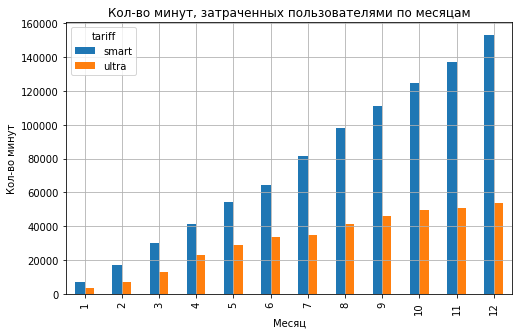

In [45]:
(users_info
 .pivot_table(index='month', columns='tariff', values='talk_time', aggfunc=sum)
 .plot(kind='bar', figsize=(8,5), 
       title='Кол-во минут, затраченных пользователями по месяцам', grid=True))
plt.xlabel('Месяц')
plt.ylabel('Кол-во минут')

Text(0, 0.5, 'Кол-во сообщений, шт')

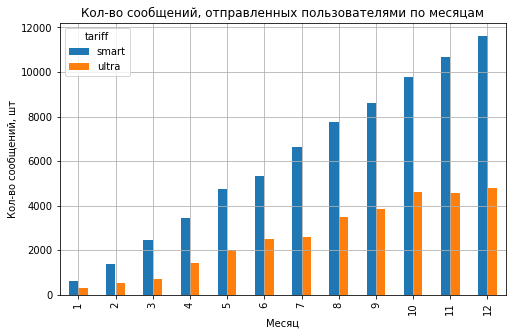

In [46]:
(users_info
 .pivot_table(index='month', columns='tariff', values='count_messages', aggfunc=sum)
 .plot(kind='bar', figsize=(8,5), 
       title='Кол-во сообщений, отправленных пользователями по месяцам', grid=True))
plt.xlabel('Месяц')
plt.ylabel('Кол-во сообщений, шт')

Text(0, 0.5, 'Объем трафика, ГБ')

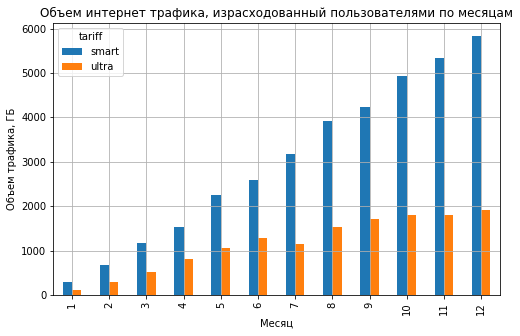

In [47]:
(users_info
 .pivot_table(index='month', columns='tariff', values='gb_used', aggfunc=sum)
 .plot(kind='bar', figsize=(8,5), 
       title='Объем интернет трафика, израсходованный пользователями по месяцам', grid=True))
plt.xlabel('Месяц')
plt.ylabel('Объем трафика, ГБ')

### Строим гистограммы распределение каждого ресурса (смс, звонки, интернет)

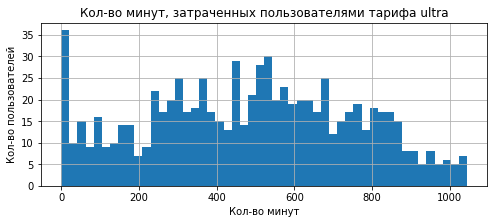

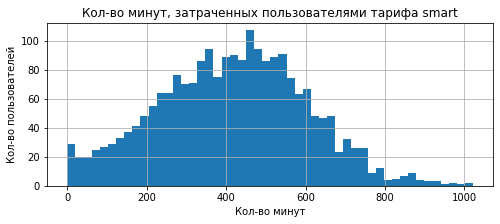

In [136]:
(users_info[users_info['tariff'] == 'ultra']['talk_time']
 .plot(kind='hist', figsize=(8,3), bins = 50,
       title='Кол-во минут, затраченных пользователями тарифа ultra', grid=True))
plt.xlabel('Кол-во минут')
plt.ylabel('Кол-во пользователей')
plt.show()

(users_info[users_info['tariff'] == 'smart']['talk_time']
 .plot(kind='hist', figsize=(8,3), bins = 50,
       title='Кол-во минут, затраченных пользователями тарифа smart', grid=True))
plt.xlabel('Кол-во минут')
plt.ylabel('Кол-во пользователей')
plt.show()

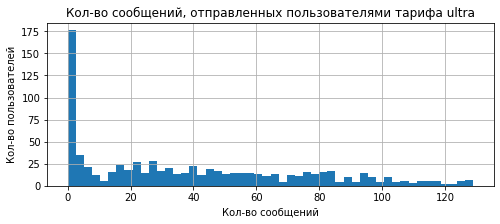

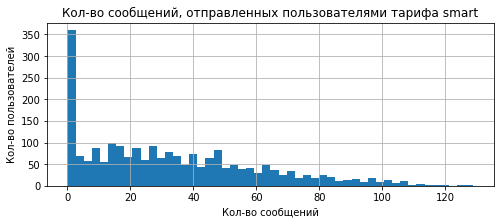

In [135]:
(users_info[users_info['tariff'] == 'ultra']['count_messages']
 .plot(kind='hist', figsize=(8,3), bins = 50,
       title='Кол-во сообщений, отправленных пользователями тарифа ultra', grid=True))
plt.xlabel('Кол-во сообщений')
plt.ylabel('Кол-во пользователей')
plt.show()

(users_info[users_info['tariff'] == 'smart']['count_messages']
 .plot(kind='hist', figsize=(8,3), bins = 50,
       title='Кол-во сообщений, отправленных пользователями тарифа smart', grid=True))
plt.xlabel('Кол-во сообщений')
plt.ylabel('Кол-во пользователей')
plt.show()

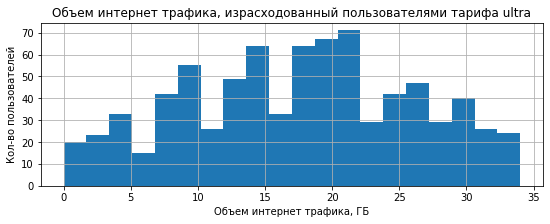

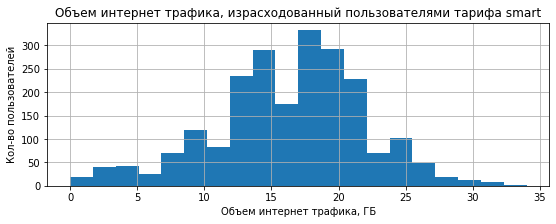

In [137]:
(users_info[users_info['tariff'] == 'ultra']['gb_used']
 .plot(kind='hist', figsize=(9,3), bins = 20,
       title='Объем интернет трафика, израсходованный пользователями тарифа ultra', grid=True))
plt.xlabel('Объем интернет трафика, ГБ')
plt.ylabel('Кол-во пользователей')
plt.show()

(users_info[users_info['tariff'] == 'smart']['gb_used']
 .plot(kind='hist', figsize=(9,3), bins = 20,
       title='Объем интернет трафика, израсходованный пользователями тарифа smart', grid=True))
plt.xlabel('Объем интернет трафика, ГБ')
plt.ylabel('Кол-во пользователей')
plt.show()

#### Вывод по гистограммам
* По кол-ву затраченных минут тариф *ultra* более равномерный. Распределение по тарифу *smart* напоминает нормальное распределение. Многие пользователя тарифа *ultra* не используют телефон для звонков.
* Большое кол-во людей в обоих тарифах не пользуются смс. Скорее всего их заменяют месенджеры.
* Пользователи тарифа *ultra* гораздо больше используют интернет. Использование интернета в тарифе *smart* напоминает нормальное.
  
Возможно на гистограммы повлиял тот факт, что выборка по тарифам разная и не очень большая.

#### Посчитаем среднее количество, дисперсию и стандартное отклонение

In [48]:
(users_info.
    pivot_table(index='month', columns='tariff', 
                values = ['talk_time', 'count_messages', 'gb_used'], 
                aggfunc ='mean'))

count_messages               gb_used              talk_time            
tariff          smart      ultra      smart      ultra       smart       ultra
month                                                                         
1           18.235294  33.777778   8.735294  13.222222  203.852941  428.111111
2           24.086207  21.958333  11.844828  12.000000  298.689655  297.125000
3           31.857143  23.903226  15.233766  16.709677  390.051948  424.161290
4           30.741071  28.920000  13.625000  16.400000  367.133929  456.420000
5           33.773050  34.406780  15.907801  18.033898  387.361702  495.661017
6           32.785276  34.712329  15.889571  17.739726  393.423313  462.602740
7           33.235000  39.059701  15.855000  17.149254  406.800000  518.343284
8           33.209402  39.909091  16.705128  17.329545  419.927350  471.340909
9           33.243243  41.074468  16.366795  18.319149  427.505792  492.042553
10          33.406143  46.494949  16.846416  18.151515  424.730375  503.878788
11          33.879365  44.173077  16.939683  17.298077  434.222222  490.740385
12          35.501529  47.435644  17.819572  19.019802  467.272171  533.277228

In [49]:
(users_info.
    pivot_table(index='tariff',
                values = ['talk_time', 'count_messages', 'gb_used'], 
                aggfunc = ['mean', np.var, np.std]))

mean                                   var             \
       count_messages    gb_used   talk_time count_messages    gb_used   
tariff                                                                   
smart       33.039313  16.237686  415.058744     767.279195  31.752702   
ultra       39.499374  17.543179  484.617021    1283.064849  72.193309   

                                std                        
           talk_time count_messages   gb_used   talk_time  
tariff                                                     
smart   34931.467615      27.699805  5.634954  186.899619  
ultra   71358.705274      35.819895  8.496665  267.130502

### Вывод

* Тариф *smart* пользуется большей популярность, чем тариф *ultra*.
* Прирост пользователей больше у тарифа *smart* ростет с каждым месяцем, при этом тариф *ultra* показывает динамику хуже.
* Пользователи тарифа *ultra* в среднем чуть больше звонят и сидят в интернете, а так же пишут намного больше смс.
* Дисперсия у тарифа *ultra* в 2 раза больше, что говорит о большем разбросе в значениях.
* Стандартное отклонение у тарифа *ultra* выше в 1.5 раза.
  
Все больше людей стремится подключиться к тарифу *smart*, при этом в среднем они не намного меньше пользуются услугами оператора связи, чем пользователи тарифа *ultra*. Возможно людям проще контролировать свои расходы, отдавая каждый месяц плату в 550 руб. и доплачивая за перерасход пакетов, чем сразу платить практически в 4 раза больше, зная, что большая часть пакетов не будет использована.

## Проверка гипотез
Требуется пояснить:  
* Как была сформирована нулевая и альтернативная гипотеза.
* Какой критерий использовался для проверки гипотез и почему.

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

**Нулевая гипотеза** - средняя выручка пользователей тарифа "Смарт" равна средней выручке пользователей тарифа "Ультра".  
**Альтернативная гипотеза** - средняя выручка пользователей тарифа "Смарт" отличается от средней выручки пользователей тарифа "Ультра".

Сперва создадим две переменных, в которые сохраним выручку по каждому из тарифов.

In [50]:
smart = users_info[users_info['tariff'] == 'smart']['earnings']
ultra = users_info[users_info['tariff'] == 'ultra']['earnings']

Далее зададим уровень критической статистической значимости - 0.05.

In [51]:
alpha = 0.05

Используем t-тест для независимых выборок.

In [52]:
results = st.ttest_ind(smart, ultra) 
results.pvalue < alpha

True

#### Попробуем найти среднее двух тарифов и построим график.

In [53]:
(users_info.pivot_table(index='tariff', values = 'earnings', aggfunc = 'mean'))

,earnings
tariff,
smart,1267.406236
ultra,1973.466834


Text(0, 0.5, 'Объем выручки, руб')

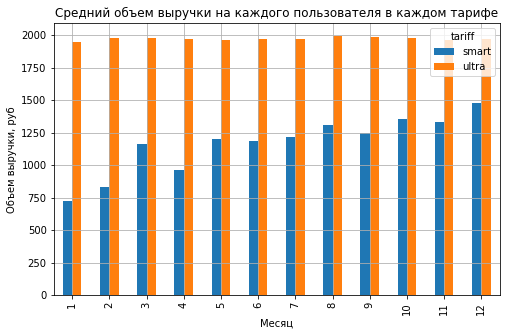

In [54]:
(users_info
 .pivot_table(index='month', columns='tariff', values='earnings', aggfunc='mean')
 .plot(kind='bar', figsize=(8,5), 
       title='Средний объем выручки на каждого пользователя в каждом тарифе', grid=True))
plt.xlabel('Месяц')
plt.ylabel('Объем выручки, руб')

#### Построим гистограммы для проверки гипотез.

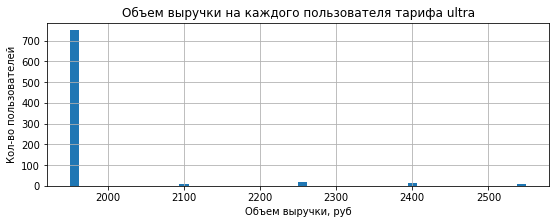

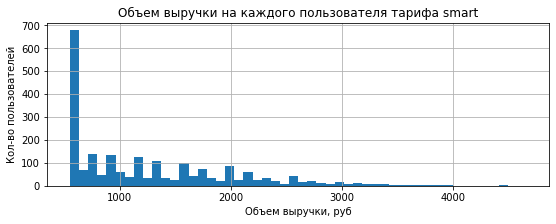

In [142]:
(users_info[users_info['tariff'] == 'ultra']['earnings']
 .plot(kind='hist', figsize=(9,3), bins = 50,
       title='Объем выручки на каждого пользователя тарифа ultra', grid=True))
plt.xlabel('Объем выручки, руб')
plt.ylabel('Кол-во пользователей')
plt.show()

(users_info[users_info['tariff'] == 'smart']['earnings']
 .plot(kind='hist', figsize=(9,3), bins = 50,
       title='Объем выручки на каждого пользователя тарифа smart', grid=True))
plt.xlabel('Объем выручки, руб')
plt.ylabel('Кол-во пользователей')
plt.show()

#### Вывод
Учитывая результаты проверки гипотезы, мы не можем опровергуть альтернативную гипотезу, т.к. результаты у двух ниже статистической значимости, а значит они могут различаться.  
Это так же подтверждается графиком и средним значением.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

**Нулевая гипотеза** - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.  
**Альтернативная гипотеза** - средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов.

Сперва добавим в таблицу с информацией о пользователях города из таблицы пользователей.

In [55]:
users_info_city = users_info.merge(users[['user_id', 'city']], on = ['user_id'])
users_info_city.head()

,user_id,month,count_calls,talk_time,mb_used,count_messages,gb_used,tariff,earnings,city
0,1000,5,22.0,159.0,2253.49,22.0,3.0,ultra,1950.0,Краснодар
1,1000,6,43.0,172.0,23233.77,60.0,23.0,ultra,1950.0,Краснодар
2,1000,7,47.0,340.0,14003.64,75.0,14.0,ultra,1950.0,Краснодар
3,1000,8,52.0,408.0,14055.93,81.0,14.0,ultra,1950.0,Краснодар
4,1000,9,58.0,466.0,14568.91,57.0,15.0,ultra,1950.0,Краснодар


Сгруппируем данные о выручке в Москве и прочих регионах. Сохраним их в переменные.

In [56]:
msc = users_info_city[users_info_city['city'] == 'Москва']['earnings']
other = users_info_city[users_info_city['city'] != 'Москва']['earnings']

Уровень критической статистической значимости возьмем из прошлой гипотезы.  
Используем t-тест для независимых выборок.

In [57]:
results = st.ttest_ind(msc, other) 
results.pvalue < alpha

False

#### Найдем среднее двух тарифов и построим график.

In [58]:
round(msc.mean())

1477

In [59]:
round(other.mean())

1449

Это я делаю, чтобы отобразить нормально легенду. Она не меняется через plt.

In [60]:
msc_mean = (users_info_city[users_info_city['city'] == 'Москва'].
            pivot_table(index='month', values='earnings', aggfunc='mean'))
msc_mean.columns = ['Москва']
other_mean = (users_info_city[users_info_city['city'] != 'Москва'].
            pivot_table(index='month', values='earnings', aggfunc='mean'))
other_mean.columns = ['регионы']

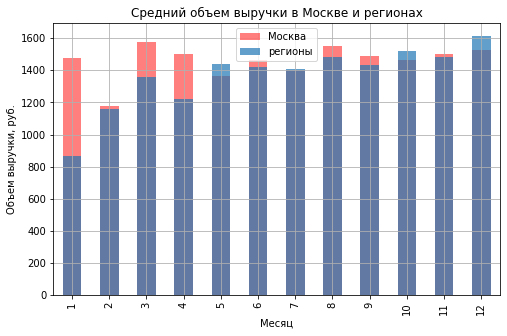

In [61]:
ax = (msc_mean
 .plot(kind='bar', figsize=(8,5), alpha = 0.5, color = 'red', grid=True, label = 'Москва'))

(other_mean
 .plot(kind='bar', figsize=(8,5), ax = ax, alpha = 0.7, label = 'регионы', 
       title ='Средний объем выручки в Москве и регионах', grid=True))
plt.xlabel('Месяц')
plt.ylabel('Объем выручки, руб.')
plt.show()

#### Построим гистограммы для проверки гипотез.

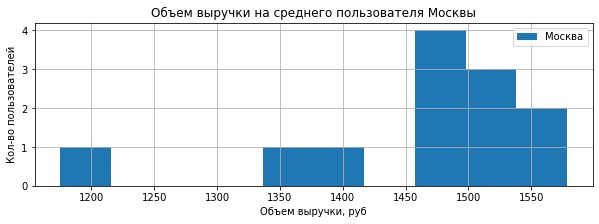

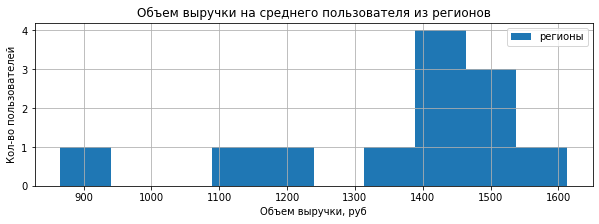

In [144]:
(msc_mean
 .plot(kind='hist', figsize=(10,3), bins = 10,
       title='Объем выручки на среднего пользователя Москвы', grid=True))
plt.xlabel('Объем выручки, руб')
plt.ylabel('Кол-во пользователей')
plt.show()

(other_mean
 .plot(kind='hist', figsize=(10,3), bins = 10,
       title='Объем выручки на среднего пользователя из регионов', grid=True))
plt.xlabel('Объем выручки, руб')
plt.ylabel('Кол-во пользователей')
plt.show()

#### Вывод
Учитывая результат проверки гипотезы, мы не можем опровергнуть, что выручка в Москве и регионах НЕ отличается. Значит предположение об обратном выглядит сомнительно.  
То же самое показывает график и среднее, значения практически идентичны.

## Общий вывод
Изначальные данные были представлены в 5 таблицах. Пропуски и ошибки в данных не обнаружены.  
* Оба тарифа пользуются популярность, при этом *smart* показывает восходящую динамику.  
* Пользователи тарифа *ultra* разговаривают и отправляют смс на 20% больше, при этом пользуются интернетом на 10% больше.
___
Мы подтвердили гипотезу о том, что средняя выручка пользователей тарифов *smart* и *ultra* различаются.Тариф *ultra* в среднем на одного пользователя, приносит бОльшую выручку по сравнению с тарифом *smart*. 
___
Мы опровергли гипотезу, о том, что средняя выручка пользователей Москвы и регионов различается. Различие не настолько существенное, чтобы судить о значимости данного фактора.